Mini Proyecto: Proceso ETL con Datos de Ventas

📌 Objetivo:

Realizar un proceso ETL con datos de ventas, incluyendo extracción de datos desde un archivo CSV, limpieza y transformación, y carga en una base de datos o archivo limpio para análisis.

🔹 Paso 1: Descargar Dataset (Extracción - Extract)

In [4]:
import pandas as pd

df_ventas = pd.read_csv('../data/ventas.csv')
df_ventas.head(5)

,Order_ID,Fecha,Cliente,Producto,Cantidad,Precio,Ciudad,Estado,Código Postal,Método de Pago
0,1001,01-02-2024,Juan Pérez,Laptop,1.0,15000.0,Monterrey,Nuevo León,64000.0,Tarjeta
1,1002,02-02-2024,María López,Teclado,2.0,800.0,CDMX,CDMX,1000.0,Efectivo
2,1003,03-02-2024,Carlos Gómez,Mouse,1.0,500.0,Guadalajara,Jalisco,44100.0,Tarjeta
3,1004,04-02-2024,Laura Martínez,Monitor,1.0,3000.0,Puebla,Puebla,72000.0,Transferencia
4,1005,05-02-2024,Pedro Sánchez,Impresora,1.0,2500.0,Mérida,Yucatán,97000.0,Tarjeta


🔹 Paso 2: Limpieza y Transformación (Transform - Clean & Transform)

Limpiaremos y transformaremos los datos con Pandas:
-  Eliminar filas con datos faltantes
-  Convertir formatos (Fechas en formato datetime, precios en float, cantidades en enteros)
-  Crear una nueva columna "Total" (Cantidad * Precio)
-  Normalizar nombres de clientes (Eliminar espacios extra y convertir en formato título)

In [5]:
# Eliminar filas con datos faltantes
df_ventas.dropna(inplace=True)
df_ventas.head(5)

,Order_ID,Fecha,Cliente,Producto,Cantidad,Precio,Ciudad,Estado,Código Postal,Método de Pago
0,1001,01-02-2024,Juan Pérez,Laptop,1.0,15000.0,Monterrey,Nuevo León,64000.0,Tarjeta
1,1002,02-02-2024,María López,Teclado,2.0,800.0,CDMX,CDMX,1000.0,Efectivo
2,1003,03-02-2024,Carlos Gómez,Mouse,1.0,500.0,Guadalajara,Jalisco,44100.0,Tarjeta
3,1004,04-02-2024,Laura Martínez,Monitor,1.0,3000.0,Puebla,Puebla,72000.0,Transferencia
4,1005,05-02-2024,Pedro Sánchez,Impresora,1.0,2500.0,Mérida,Yucatán,97000.0,Tarjeta


In [11]:
# Convertir fotmatos 
# Fecha
df_ventas['Fecha'] = pd.to_datetime(df_ventas['Fecha'], errors='coerce')

# Precios
df_ventas['Precio'] = df_ventas['Precio'].astype(float)

# Cantidades
df_ventas['Cantidad'] = df_ventas['Cantidad'].astype(int)

df_ventas.head(5)

,Order_ID,Fecha,Cliente,Producto,Cantidad,Precio,Ciudad,Estado,Código Postal,Método de Pago
0,1001,2024-01-02,Juan Pérez,Laptop,1,15000.0,Monterrey,Nuevo León,64000.0,Tarjeta
1,1002,2024-02-02,María López,Teclado,2,800.0,CDMX,CDMX,1000.0,Efectivo
2,1003,2024-03-02,Carlos Gómez,Mouse,1,500.0,Guadalajara,Jalisco,44100.0,Tarjeta
3,1004,2024-04-02,Laura Martínez,Monitor,1,3000.0,Puebla,Puebla,72000.0,Transferencia
4,1005,2024-05-02,Pedro Sánchez,Impresora,1,2500.0,Mérida,Yucatán,97000.0,Tarjeta


In [ ]:
# Crear una columna con el total de la venta
df_ventas['Total'] = df_ventas['Precio'] * df_ventas['Cantidad']
df_ventas.head(5)

,Order_ID,Fecha,Cliente,Producto,Cantidad,Precio,Ciudad,Estado,Código Postal,Método de Pago,Total
0,1001,2024-01-02,Juan Pérez,Laptop,1,15000.0,Monterrey,Nuevo León,64000.0,Tarjeta,15000.0
1,1002,2024-02-02,María López,Teclado,2,800.0,CDMX,CDMX,1000.0,Efectivo,1600.0
2,1003,2024-03-02,Carlos Gómez,Mouse,1,500.0,Guadalajara,Jalisco,44100.0,Tarjeta,500.0
3,1004,2024-04-02,Laura Martínez,Monitor,1,3000.0,Puebla,Puebla,72000.0,Transferencia,3000.0
4,1005,2024-05-02,Pedro Sánchez,Impresora,1,2500.0,Mérida,Yucatán,97000.0,Tarjeta,2500.0


In [ ]:
# Normalizar nombres de clientes (eliminar espacios extra y formatear)
df_ventas['Cliente'] = df_ventas['Cliente'].str.strip().str.title()
df_ventas.head(5)

,Order_ID,Fecha,Cliente,Producto,Cantidad,Precio,Ciudad,Estado,Código Postal,Método de Pago,Total
0,1001,2024-01-02,Juan Pérez,Laptop,1,15000.0,Monterrey,Nuevo León,64000.0,Tarjeta,15000.0
1,1002,2024-02-02,María López,Teclado,2,800.0,CDMX,CDMX,1000.0,Efectivo,1600.0
2,1003,2024-03-02,Carlos Gómez,Mouse,1,500.0,Guadalajara,Jalisco,44100.0,Tarjeta,500.0
3,1004,2024-04-02,Laura Martínez,Monitor,1,3000.0,Puebla,Puebla,72000.0,Transferencia,3000.0
4,1005,2024-05-02,Pedro Sánchez,Impresora,1,2500.0,Mérida,Yucatán,97000.0,Tarjeta,2500.0


🔹 Paso 3: Carga de Datos (Load - Load to Destination)

Opciones para almacenar los datos limpios:

✅ Guardarlos en un nuevo archivo CSV

✅ Subirlos a una base de datos SQL

In [ ]:
# Guardar el archivo limpio
df_ventas.to_csv('../data/ventas_limpio.csv', index=False)

🔹 Paso 4: Análisis de Datos

Ahora que tenemos los datos limpios, podemos hacer análisis:

- Ventas totales por mes (gráfico de barras)
- Método de pago más utilizado (gráfico de pastel)
- Top 5 productos más vendidos (gráfico de barras horizontales)

Si quieres que hagamos estos análisis con matplotlib o seaborn, dime y los generamos. 🚀

In [16]:
# Ventas totales por mes 
import seaborn as sns
import matplotlib.pyplot as plt

df_ventas_limpias = pd.read_csv('../data/ventas_limpio.csv')
df_ventas_limpias.head(5)

,Order_ID,Fecha,Cliente,Producto,Cantidad,Precio,Ciudad,Estado,Código Postal,Método de Pago,Total
0,1001,2024-01-02,Juan Pérez,Laptop,1,15000.0,Monterrey,Nuevo León,64000.0,Tarjeta,15000.0
1,1002,2024-02-02,María López,Teclado,2,800.0,CDMX,CDMX,1000.0,Efectivo,1600.0
2,1003,2024-03-02,Carlos Gómez,Mouse,1,500.0,Guadalajara,Jalisco,44100.0,Tarjeta,500.0
3,1004,2024-04-02,Laura Martínez,Monitor,1,3000.0,Puebla,Puebla,72000.0,Transferencia,3000.0
4,1005,2024-05-02,Pedro Sánchez,Impresora,1,2500.0,Mérida,Yucatán,97000.0,Tarjeta,2500.0


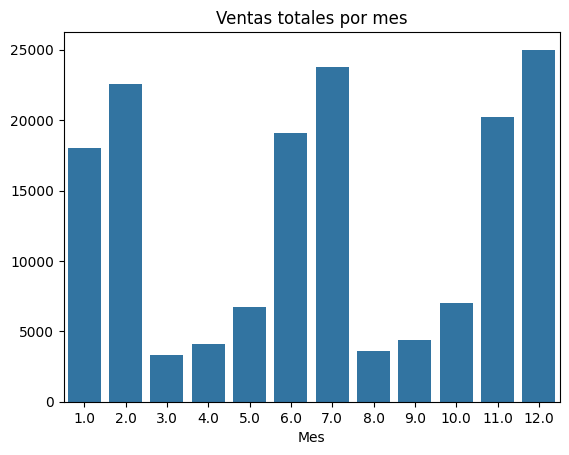

In [ ]:
# Ventas totales por mes 
df_ventas_limpias['Mes'] = df_ventas_limpias['Fecha'].dt.month
datos_mes = df_ventas_limpias.groupby('Mes')['Total'].sum()
sns.barplot(x=datos_mes.index, y=datos_mes.values)
plt.title('Ventas totales por mes')
plt.show()

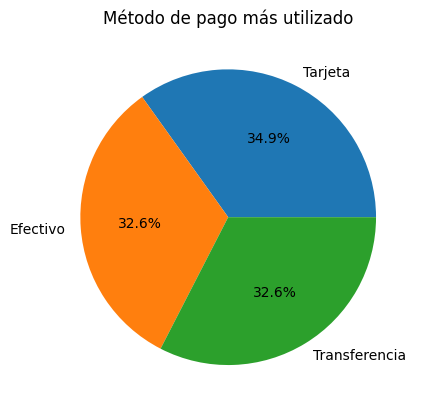

In [31]:
# Método de pago más utilizado Gráfica de pastel
datos_pago = df_ventas_limpias['Método de Pago'].value_counts()
plt.pie(datos_pago.values, labels=datos_pago.index, autopct='%1.1f%%')
plt.title('Método de pago más utilizado')
plt.show()

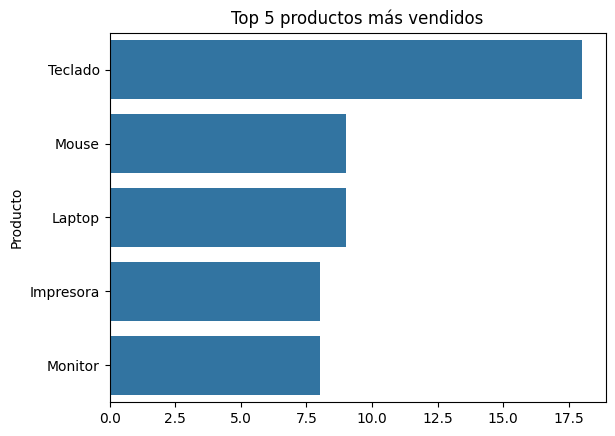

In [34]:
# Top 5 productos más vendidios (G´rafico de barras horizontales)
datos_productos = df_ventas_limpias.groupby('Producto')['Cantidad'].sum().nlargest(5)
sns.barplot(x=datos_productos.values, y=datos_productos.index)
plt.title('Top 5 productos más vendidos')
plt.show()